In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("C:\\Users\\Tanishq\\Downloads\\Data.csv")
x = data.iloc[:, 0].to_numpy()
y = data.iloc[:, 1].to_numpy()
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 1, test_size = 0.2)

In [4]:
class LinearRegression:
    def __init__(self, x, y):
        self.w = 0
        self.b = 0
        self.pred_y = []
        self.x = x
        self.y = y

    def grad_d(self, w, b, pred_y, x, y):
        summation_loss_w = 0
        summation_loss_b = 0`
        print(len(pred_y))
        for i in range(len(pred_y)):
            loss = pred_y[i] - self.y[i]
            loss_n_w = loss * 2*self.x[i]
            loss_n_b = loss * 2
            summation_loss_w+=loss_n_w
            summation_loss_b+=loss_n_b
        w_deri = summation_loss_w / len(pred_y)
        b_deri = summation_loss_b / len(pred_y)
        
        learning_rate = 0.01
        
        new_w = w - (learning_rate * w_deri)
        new_b = b - (learning_rate * b_deri)
        return new_w, new_b

    def r2_score(self):
        y_mean = sum(self.y) / len(self.y)
        ss_total = sum((yi - y_mean)**2 for yi in self.y)
        ss_res = sum((self.w * self.x[i] + self.b - self.y[i])**2 for i in range(len(self.y)))
        return 1 - (ss_res / ss_total)


    def mse(self):
        error = 0
        for i in range(len(self.y)):
            error += (self.w * self.x[i] + self.b - self.y[i])**2
        return error / len(self.y)

    
    def model(self, epochs = 100):
        self.w = 0
        self.b = 0
        #output
        for j in range(epochs):
            for i in range(len(self.x)):
                pred = self.w * self.x[i] + self.b
                self.pred_y.append(pred)
            self.w, self.b = self.grad_d(self.w, self.b, self.pred_y, self.x, self.y)
            print(f"Accuracy = {self.r2_score()}, loss = {self.mse()}")
            self.pred_y = []
        return self.r2_score()

    
    
    def predict(self, x):
        predicted = []
        for i in x:
            ans = self.w * i + self.b
            predicted.append(ans)
        return predicted

In [46]:
test = LinearRegression(train_x,train_y)

In [48]:
test.model(1200)

80
Accuracy = -1.7551984986682028, loss = 85.51728697898452
80
Accuracy = -1.57218426172812, loss = 79.83679570795262
80
Accuracy = -1.4024257096985804, loss = 74.5677412938825
80
Accuracy = -1.2449543676955241, loss = 69.68006370856494
80
Accuracy = -1.0988725800325305, loss = 65.14590104695712
80
Accuracy = -0.9633483311595838, loss = 60.939428776780844
80
Accuracy = -0.8376104453537268, loss = 57.03671074401918
80
Accuracy = -0.7209441374629324, loss = 53.41556107458583
80
Accuracy = -0.6126868890301636, loss = 50.05541617531438
80
Accuracy = -0.5122246260020908, loss = 46.93721609568936
80
Accuracy = -0.4189881759671641, loss = 44.04329456575506
80
Accuracy = -0.33244998448064766, loss = 41.35727707570054
80
Accuracy = -0.2521210715292066, loss = 38.863986409021244
80
Accuracy = -0.17754821057331482, loss = 36.54935508416696
80
Accuracy = -0.10831131389002668, loss = 34.40034419944809
80
Accuracy = -0.04402100912908957, loss = 32.404868212921166
80
Accuracy = 0.01568360690132331, l

0.989084741146339

In [50]:
pred_y = test.predict(test_x)
from sklearn.metrics import r2_score
acc = r2_score(test_y, pred_y)
print(acc)

0.9903091295220195


In [52]:
def mse(pred, act):
    total = 0
    mean_sL = []
    for x in range(0, len(pred)):
        mean_s = (pred[x] - act[x])**2
        mean_sL.append(mean_s)
        total+=mean_s
    return (total/len(pred), mean_sL)

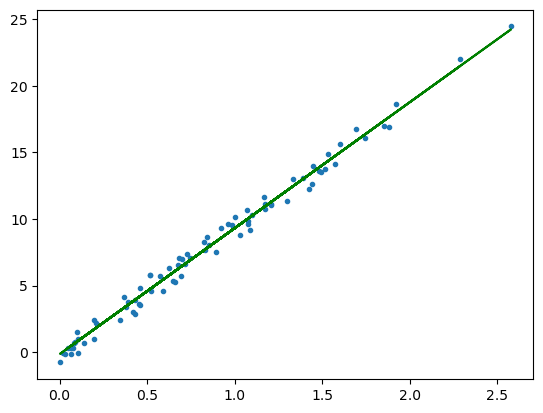

In [54]:
plt.plot(train_x, train_y, '.')
pred_train = test.predict(train_x)
plt.plot(train_x, pred_train, '-', color = 'green')
plt.show()

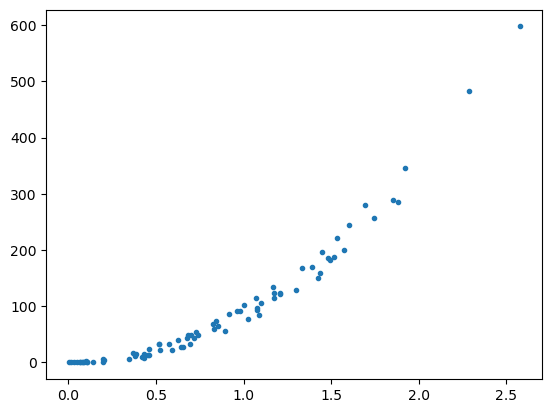

In [56]:
dummy = [0]*80
loss, losses = mse(dummy, train_y)
plt.plot(train_x, losses, '.')
plt.show()